# Image Classifier Using Saved Keras Model

Since `ml5_ipynb` is not an optimal platform for training a large model, it provides an option to load models tained on keras. For now, imageClassifier has such function to load keras model. The model in this example was trained on images of three classes, dobby, train, zucchini. The performance of predicting images of labels other than these three classes will not be as good as pre-trained models trained on ImageNet.

In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import requests
from PIL import Image
import io
%matplotlib inline

In [2]:
dobby = os.listdir('pic/dobby')[1:]
zucchini = os.listdir('pic/zucchini')[1:]
train = os.listdir('pic/train')[1:]
dobby_list = ['pic/dobby/'+i for i in dobby]
zucchini_list = ['pic/zucchini/'+i for i in zucchini]
train_list = ['pic/train/'+i for i in train]

Text(0.5, 1.0, 'zucchini')

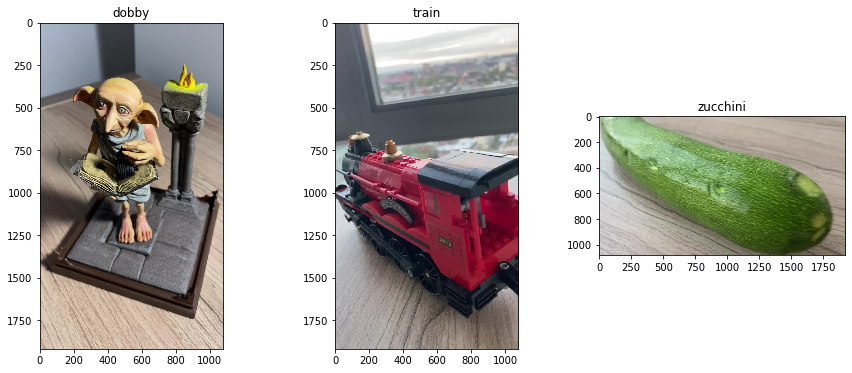

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,6))
ax[0].imshow(plt.imread(dobby_list[0]))
ax[0].set_title('dobby')
ax[1].imshow(plt.imread(train_list[0]))
ax[1].set_title('train')
ax[2].imshow(plt.imread(zucchini_list[0]))
ax[2].set_title('zucchini')

Three images above are sample image belonging to each of three classes.   

Since the model takes the input images with the shape of $192\times 192$, we need to resize it before passing image data into model. There are two alternative ways to pass data, one is to pass path of image (not online image address), another is to pass an array of image pixels values in RGBA mode.

In [3]:
from ml5_ipynb import ml5_image

In [4]:
path = 'models/keras_trained/model.json'

In [5]:
nn = ml5_image.imageClassifier()

..............Model is ready


In [6]:
nn.keras_loadModel(path)

.Model is ready


After we loaded the model, we need to define a function called `predict` to collaborate with ipywidgets module to present our predicted results.  

There are three python widgets, img_wig that displays our input image, true_wig that indicates the true label for the image, and pred_wig that indicates the predicted label with corresponding confidence score for the image.  

The function `get_image_online` will take online image source link as input and return an array of resized image pixel values. 

**Note:** if the input image is an array, it needs to be in RGBA. 

In [19]:
def predict(input_img, label):
    class_dict = {'0':'dobby','1':'train','2':'zucchini'}
    nn.keras_predict(input_img,[192,192,3])
    pred, confidence = sorted(nn.classify_callback_list[-1].items(),key= lambda x:-x[1])[0]
    image = input_img
    if isinstance(image,str): # image local path
        file = open(input_img, "rb")
        image = file.read()
    else: # online image resource
        success, encoded_image = cv2.imencode('.png', 
                                             cv2.cvtColor(input_img, cv2.COLOR_RGB2RGBA))
        content2 = encoded_image.tobytes()
        image = content2
    
    img_wig = widgets.Image(
            value=image,
            format='png',
            width=192,
            height=192,
    )
    true_wig = widgets.HTML(
        value = label,
        placeholder='',
        description='True',
        color = 'red'
    )
    pred_wig = widgets.HTML(
        value=f'{class_dict[pred]} ({confidence*100}%)',
        placeholder='',
        description='Prediction',
    )
    return widgets.Box([img_wig, widgets.VBox([true_wig, pred_wig])])

def get_image_online(url):
    r = requests.get(url)
    img_array = None
    ii = 0
    with io.BytesIO(r.content) as f:
        with Image.open(f) as img:
            img = img.convert('RGBA')
            img = img.resize((192,192), Image.ANTIALIAS)
            img_array = np.array(img)
            img_array = img_array.astype('float32') 
    return img_array

### Local Image File

In [12]:
# img_url= 'pic/dobby_online1.jpg'
img_url = 'pic/dobby_online2.jpg'
# img_url = 'pic/dobby_online3.jpg'
predict(img_url,'dobby')

..done


Box(children=(Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00H\x00H\x00\x00\xff\xdb\x00C\x00\x0…

### Online Image Source

In [20]:
online_url = 'https://cdn.shopify.com/s/files/1/0277/5370/9706/products/Doen-bby_300x300.jpg?v=1582373736'
# online_url = 'https://prodimage.images-bn.com/pimages/0849421005719_p0_v1_s550x406.jpg'
img_array = get_image_online(online_url)
predict(img_array, 'dobby')

..done


Box(children=(Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\xc0\x00\x00\x00\xc0\x08\x06\x00\x0…